<a href="https://colab.research.google.com/github/viveksharma-niet/LinearRegressionUpgrad/blob/main/MultiLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
housingdata = pd.read_csv("https://raw.githubusercontent.com/viveksharma-niet/LinearRegressionUpgrad/refs/heads/main/Housing.csv")
housingdata.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


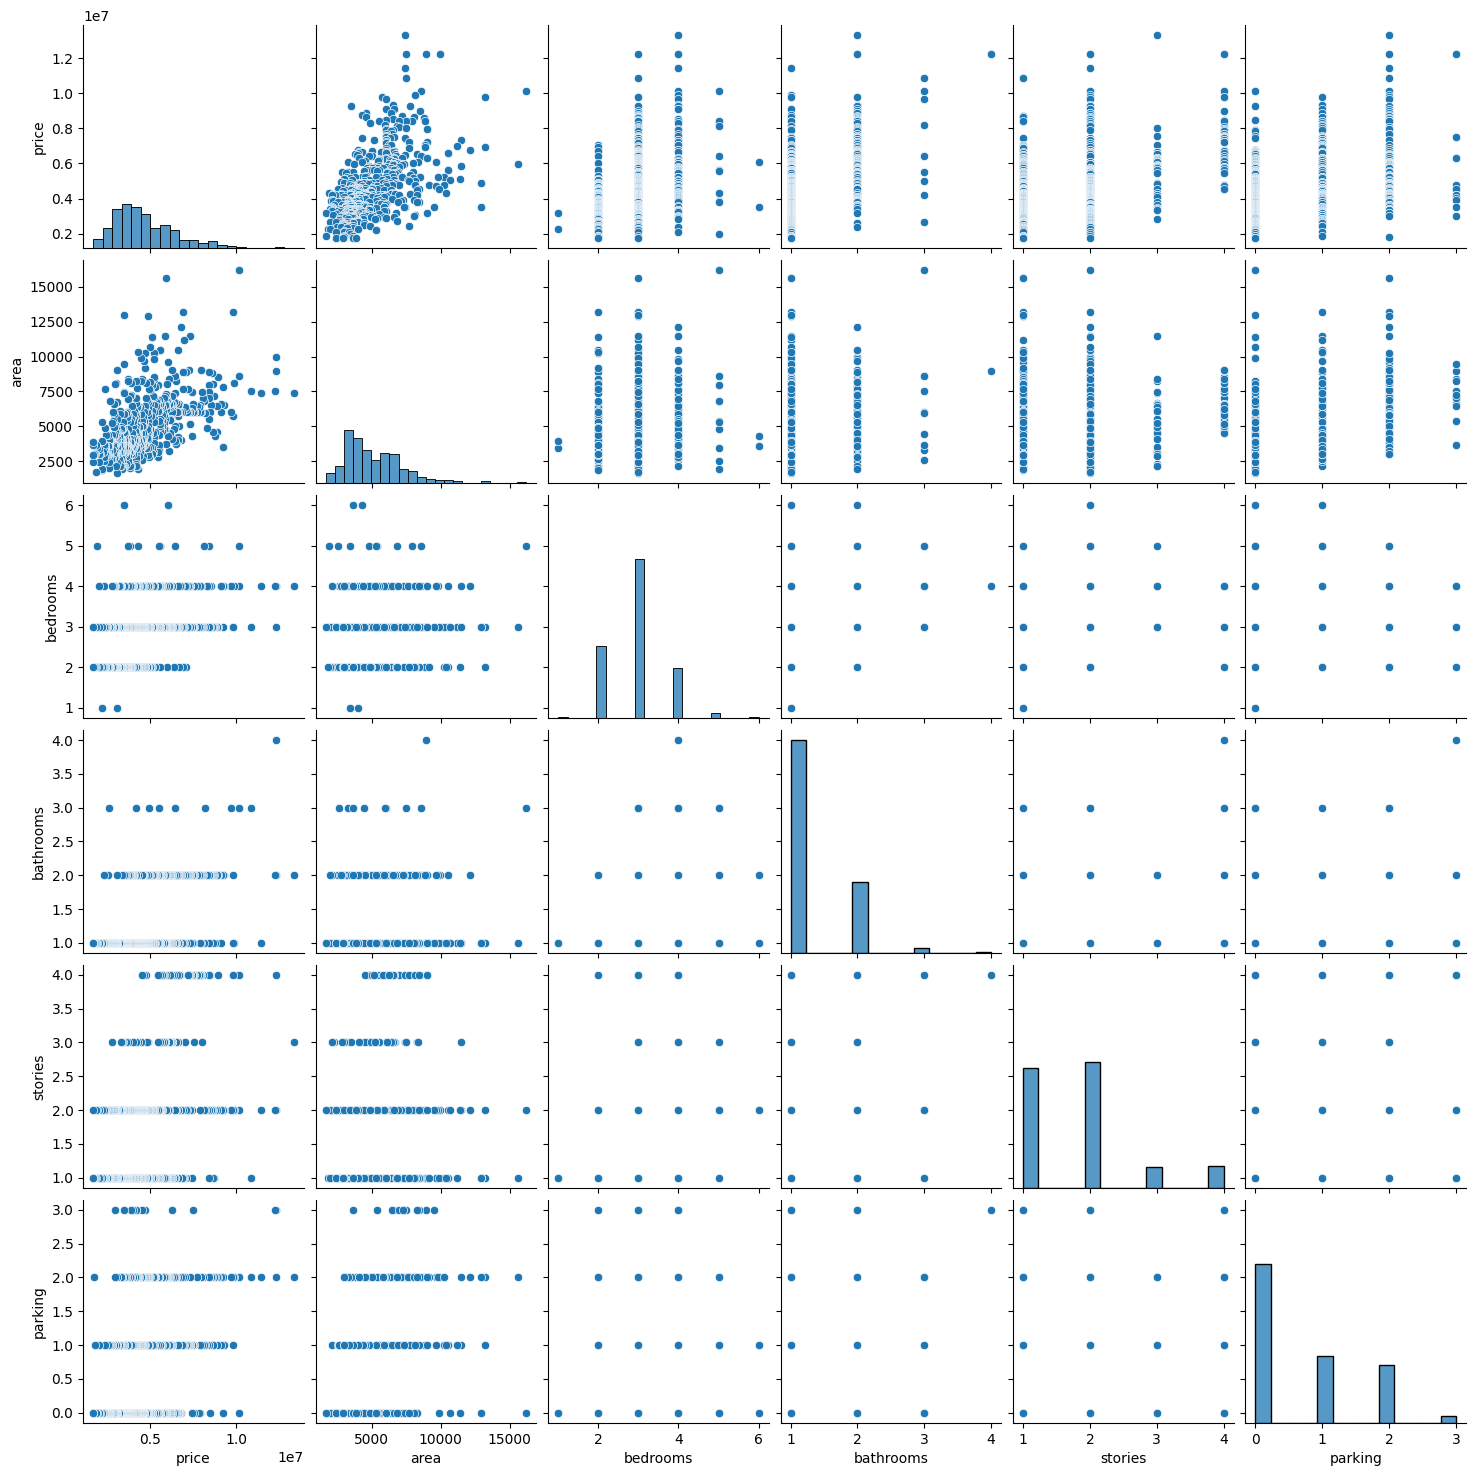

In [71]:
sns.pairplot(housingdata)

In [72]:
housingdata.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [73]:
## Show categorical values through boxplot

In [74]:
varlist = ['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [75]:
housingdata.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [76]:
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'] # Corrected typo
housingdata[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [77]:
housingdata[varlist] = housingdata[varlist].apply(lambda x: x.map({'yes':1, 'no':0}))

In [78]:
housingdata.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [79]:
status = pd.get_dummies(housingdata['furnishingstatus'], drop_first=True, dtype= int)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [80]:
housingdata = pd.concat([housingdata, status], axis=1)

In [82]:
housingdata = housingdata.drop(['furnishingstatus'], axis=1)

In [81]:
## Split into train and test